In [1]:
import pandas as pd
import numpy as np
import sklearn

# nlp libraries
import string

In [2]:
df = pd.read_csv('advanced_trainset.csv')
df.head()

,Sentence,Sentiment
0,According to the Finnish-Russian Chamber of Co...,neutral
1,The Swedish buyout firm has sold its remaining...,neutral
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative


## Get the Data

A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [3]:
df.Sentence[:10]

0    According to the Finnish-Russian Chamber of Co...
1    The Swedish buyout firm has sold its remaining...
2      $SPY wouldn't be surprised to see a green close
3    Shell's $70 Billion BG Deal Meets Shareholder ...
4    SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...
5    The Stockmann department store will have a tot...
6    Circulation revenue has increased by 5 % in Fi...
7    $SAP Q1 disappoints as #software licenses down...
8    The subdivision made sales revenues last year ...
9             Viking Line has canceled some services .
Name: Sentence, dtype: object

In [4]:
for message_no, message in enumerate(df.Sentence[:10]):
    print(message_no, message)
    print('\n')

0 According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .


1 The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .


2 $SPY wouldn't be surprised to see a green close


3 Shell's $70 Billion BG Deal Meets Shareholder Skepticism


4 SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year .


5 The Stockmann department store will have a total floor space of over 8,000 square metres and Stockmann 's investment in the project will have a price tag of about EUR 12 million .


6 Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .


7 $SAP Q1 disappoints as #software licenses down. Real problem? #Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5


8 The subdi

We'll use **read_csv** and make note of the **sep** argument, we can also specify the desired column names by passing in a list of *names*.

## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [5]:
df.describe()

,Sentence,Sentiment
count,4382,4382
unique,4081,3
top,"In the first half of 2008 , the Bank 's operat...",neutral
freq,2,2363


Let's use **groupby** to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [6]:
df.groupby('Sentiment').describe()

Sentence                                                            \
             count unique                                                top   
Sentiment                                                                      
negative       636    636  Shell's $70 Billion BG Deal Meets Shareholder ...   
neutral       2363   2360  The company serves customers in various indust...   
positive      1383   1383    $SPY wouldn't be surprised to see a green close   

                
          freq  
Sentiment       
negative     1  
neutral      2  
positive     1

See how long the text messages are

In [7]:
df['length'] = df['Sentence'].apply(len)
df.head()

,Sentence,Sentiment,length
0,According to the Finnish-Russian Chamber of Co...,neutral,128
1,The Swedish buyout firm has sold its remaining...,neutral,135
2,$SPY wouldn't be surprised to see a green close,positive,47
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,56
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,190


### Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

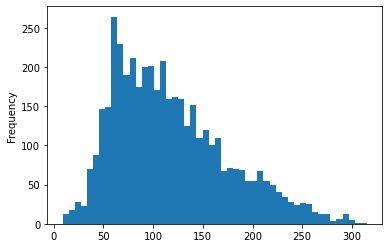

In [9]:
df['length'].plot(bins=50, kind='hist') 

Shortest message only contains up to quite a bit more than 300 words

In [10]:
df.length.describe()

count    4382.000000
mean      117.269968
std        56.811408
min         9.000000
25%        72.000000
50%       107.000000
75%       151.000000
max       315.000000
Name: length, dtype: float64

In [11]:
# See what's in the longest message
df[df['length'] == 315]['Sentence'].iloc[0]

'Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM .'

See how those sentences with their sentiment

array([[<AxesSubplot:title={'center':'negative'}>,
        <AxesSubplot:title={'center':'neutral'}>],
       [<AxesSubplot:title={'center':'positive'}>, <AxesSubplot:>]],
      dtype=object)

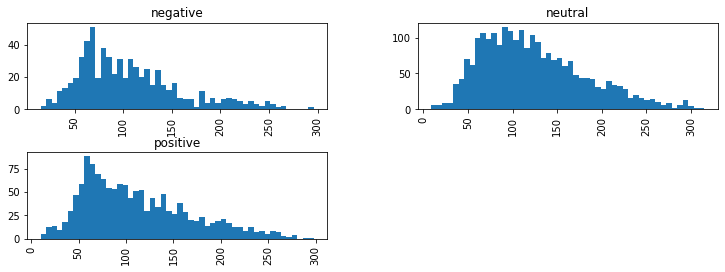

In [12]:
df.hist(column='length', by='Sentiment', bins=50,figsize=(12,4))

Everything follows a common trend: peaks around 50-100

neutral is unique

## Text Pre-processing

Removing punctuation

Taking ad of Python's built-in **string**.

In [13]:
import string

mess = 'Messs! Hello: Dollar sign $70 with other punctuations.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation or '$' in char]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)
nopunc

'Messs Hello Dollar sign $70 with other punctuations'

Now let's see how to remove stopwords. We can impot a list of english stopwords from NLTK (check the documentation for more languages and info).

In [14]:
from nltk.corpus import stopwords
stopwords.words('english')[0:11] # Show some stop words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've"]

In [15]:
# Remove any stopwords & make it lowercase
clean_mess = [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english') or '$' in word.lower()]
clean_mess

['messs', 'hello', 'dollar', 'sign', '$70', 'punctuations']

Now let's put both of these together in a function to apply it to our DataFrame later on:

# Ben function

In [86]:
def clean_sentence(s):
    # To lowercase
    s = s.lower()

    # Remove apostrophes
    s = re.sub(' \'s', '', s)

    # Fix % and $ whitespace
    s = re.sub('(?<=\d) %', '%', s)
    s = re.sub('\$ (?=\d)', '$', s)

    # Remove links
    s = re.sub('http\S+', ' ', s)

    # Remove .'s not surrounded by numbers
    s = re.sub('(?<!\d)\.|\,(?!\d)', ' ', s)

    # Remove punctuation
    s = re.sub('-|\(|\)', ' ', s)
    s = re.sub('\'|\,|\`', '', s)

    # Remove extra whitespace
    s = re.sub(' +', ' ', s)

    return s

# Add your function here and just replace all the parameter in Countvectorizer in the pipeline

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
#     return a list
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


words = defaultdict(int)
for i in cleaned["Sentence_cleaned"]:
    for i in i.split():
        words[i] += 1

words
word_index = {}
counter = 0
for i in words:
    if words[i] > 1:
        word_index[i] = counter
        counter += 1
word_index[" "] = counter

word_count = []
for sentence in cleaned["Sentence_cleaned"]:
    result = [0] * 5225
    for word in sentence.split(" "):
        if word in word_index:
            result[word_index[word]] += 1
    word_count.append(result)
new_df = df.copy()
new

# My functions

In [16]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
def text_process_with_dollar(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation or '$' in char]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords & chekc if dollar sign in it
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english') or '$' in word.lower()]

### Tokenization
Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).


In [18]:
# Check to make sure its working
df['Sentence'].head(5).apply(text_process)

0    [According, FinnishRussian, Chamber, Commerce,...
1    [Swedish, buyout, firm, sold, remaining, 224, ...
2         [SPY, wouldnt, surprised, see, green, close]
3    [Shells, 70, Billion, BG, Deal, Meets, Shareho...
4    [SSH, COMMUNICATIONS, SECURITY, CORP, STOCK, E...
Name: Sentence, dtype: object

In [19]:
# Show original dataframe
df.head()

,Sentence,Sentiment,length
0,According to the Finnish-Russian Chamber of Co...,neutral,128
1,The Swedish buyout firm has sold its remaining...,neutral,135
2,$SPY wouldn't be surprised to see a green close,positive,47
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,56
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,190


### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [21]:
# Take a while
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Sentence'])

# Show total number of vocab words
print(len(bow_transformer.vocabulary_))

12073


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [22]:
message4 = df['Sentence'][3]
print(message4)

Shell's $70 Billion BG Deal Meets Shareholder Skepticism


Now let's see its vector representation:

In [23]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 1194)	1
  (0, 1746)	1
  (0, 1868)	1
  (0, 2409)	1
  (0, 4157)	1
  (0, 5407)	1
  (0, 5414)	1
  (0, 5468)	1
(1, 12073)


In [24]:
print(bow_transformer.get_feature_names()[10])
print(bow_transformer.get_feature_names()[50])

004
043


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [25]:
messages_bow = bow_transformer.transform(df['Sentence'])

In [26]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (4382, 12073)
Amount of Non-Zero occurences:  51709


In [27]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 5468)	0.39629165715027104
  (0, 5414)	0.3778061386922472
  (0, 5407)	0.3778061386922472
  (0, 4157)	0.39629165715027104
  (0, 2409)	0.31460373363129207
  (0, 1868)	0.33308925208931595
  (0, 1746)	0.32291593716252964
  (0, 1194)	0.29365324199362997


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"`?

In [29]:
tfidf_transformer

TfidfTransformer()

In [30]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
# print(tfidf_transformer.idf_[bow_transformer.vocabulary_['']])

8.692341519858864


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [31]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4382, 12073)


## Training a model

With messages represented as vectors, we can finally train our classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [32]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['Sentiment'])

Let's try classifying our single random message and checking how we do:

In [33]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df.Sentiment[3])

predicted: positive
expected: negative


Fantastic! We've developed a model that can attempt to predict spam vs ham classification!

## Part 6: Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

In [34]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['neutral' 'neutral' 'positive' ... 'neutral' 'neutral' 'positive']


We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [35]:
from sklearn.metrics import classification_report
print (classification_report(df['Sentiment'], all_predictions))

              precision    recall  f1-score   support

    negative       1.00      0.18      0.30       636
     neutral       0.72      1.00      0.84      2363
    positive       0.91      0.66      0.76      1383

    accuracy                           0.77      4382
   macro avg       0.88      0.61      0.63      4382
weighted avg       0.82      0.77      0.74      4382



In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Sentiment'], all_predictions)

0.77110908261068

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['Sentence'], df['Sentiment'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3505 877 4382


The test size is 20% of the entire dataset, and the training is the rest. Note the default split would have been 30/70.

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neighbors import NearestNeighbors

In [65]:
pipeline_naive_bayes = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('decision_tree',  DecisionTreeClassifier(random_state=0)),
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [66]:
pipeline_tree = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('decision_tree',  DecisionTreeClassifier(random_state=0)),
#     ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [78]:
pipeline_adaboost = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('ada_boost',  AdaBoostClassifier()),
#     ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [79]:
pipeline_naive_bayes.fit(msg_train,label_train)
pipeline_tree.fit(msg_train,label_train)
pipeline_adaboost.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb65d0770d0>)),
                ('tfidf', TfidfTransformer()),
                ('ada_boost', AdaBoostClassifier())])

In [80]:
predictions_naive_bayes = pipeline_naive_bayes.predict(msg_test)
predictions_tree = pipeline_tree.predict(msg_test)
predictions_adaboost = pipeline_adaboost.predict(msg_test)

In [81]:
# new_df = df.copy()
# new_df['pred_nb'] = predictions_naive_bayes
# new_df['pred_tree'] = predictions_tree

In [82]:
# Tree
print(classification_report(predictions_tree,label_test))
accuracy_score(label_test, predictions_tree)

              precision    recall  f1-score   support

    negative       0.26      0.27      0.26       131
     neutral       0.69      0.65      0.67       485
    positive       0.58      0.64      0.61       261

    accuracy                           0.59       877
   macro avg       0.51      0.52      0.51       877
weighted avg       0.59      0.59      0.59       877



0.5895096921322691

In [83]:
# Naive Bayes
print(classification_report(predictions_naive_bayes,label_test))
accuracy_score(label_test, predictions_naive_bayes)

              precision    recall  f1-score   support

    negative       0.01      0.67      0.03         3
     neutral       0.98      0.60      0.74       752
    positive       0.33      0.77      0.46       122

    accuracy                           0.62       877
   macro avg       0.44      0.68      0.41       877
weighted avg       0.89      0.62      0.70       877



0.621436716077537

In [84]:
# Ada_boost
print(classification_report(predictions_adaboost,label_test))
accuracy_score(label_test, predictions_adaboost)

              precision    recall  f1-score   support

    negative       0.26      0.46      0.33        76
     neutral       0.91      0.61      0.73       686
    positive       0.33      0.83      0.47       115

    accuracy                           0.62       877
   macro avg       0.50      0.63      0.51       877
weighted avg       0.78      0.62      0.66       877



0.6237172177879133

# Ben functions classifer

In [90]:
import regex as re

In [88]:
pipeline_naive_bayes = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_sentence)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('decision_tree',  DecisionTreeClassifier(random_state=0)),
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline_tree = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('decision_tree',  DecisionTreeClassifier(random_state=0)),
#     ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline_adaboost = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('ada_boost',  AdaBoostClassifier()),
#     ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [91]:
pipeline_naive_bayes.fit(msg_train,label_train)
pipeline_tree.fit(msg_train,label_train)
pipeline_adaboost.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb65d0770d0>)),
                ('tfidf', TfidfTransformer()),
                ('ada_boost', AdaBoostClassifier())])

In [92]:
predictions_naive_bayes = pipeline_naive_bayes.predict(msg_test)
predictions_tree = pipeline_tree.predict(msg_test)
predictions_adaboost = pipeline_adaboost.predict(msg_test)

In [93]:
# Tree
print(classification_report(predictions_tree,label_test))
accuracy_score(label_test, predictions_tree)

              precision    recall  f1-score   support

    negative       0.26      0.27      0.26       131
     neutral       0.69      0.65      0.67       485
    positive       0.58      0.64      0.61       261

    accuracy                           0.59       877
   macro avg       0.51      0.52      0.51       877
weighted avg       0.59      0.59      0.59       877



0.5895096921322691

In [94]:
# Naive Bayes
print(classification_report(predictions_naive_bayes,label_test))
accuracy_score(label_test, predictions_naive_bayes)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.99      0.55      0.70       828
    positive       0.10      0.62      0.18        48

    accuracy                           0.55       877
   macro avg       0.37      0.39      0.29       877
weighted avg       0.94      0.55      0.67       877



0.5496009122006842

In [95]:
# Ada_boost
print(classification_report(predictions_adaboost,label_test))
accuracy_score(label_test, predictions_adaboost)

              precision    recall  f1-score   support

    negative       0.26      0.46      0.33        76
     neutral       0.91      0.61      0.73       686
    positive       0.33      0.83      0.47       115

    accuracy                           0.62       877
   macro avg       0.50      0.63      0.51       877
weighted avg       0.78      0.62      0.66       877



0.6237172177879133